# 00 - Traditional (Manual) Cleaning

Here we go through traditional manual data cleaning and investigate the effort required to do so.

For demonstration, we will use a widely available and well curated dataset [Oxford IIIT Pet dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/). 
The Oxford IIIT Pet dataset consists of images and annotations for 37 category pet with roughly 200 images for each class.
For that reason we might not find a lot of issues here but feel free to swap this dataset with your own.

## Import necessary libraries and download dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import datetime
import torch
from torchvision import datasets, transforms
from typing import Union, Tuple, Dict, List
from pathlib import Path
from PIL import Image

import sys

sys.path.append("../")

from utils import get_oxford_pets3t

We start by downloading our dataset to analyze.

Either you want to analyze your own collection or you can analyze Oxford PetIIIT.

In [2]:
dataset, df = get_oxford_pets3t(
    root_path="../data", return_dataframe=True, transform=transforms.Resize((256, 256))
)
dataset

Oxford PetIIIT already downloaded to `../data`.


Dataset ImageFolder
    Number of datapoints: 7390
    Root location: ../data
    StandardTransform
Transform: Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=warn)

In [3]:
# 2nd option -> analyze your own data
# dataset = ImageFolder(root_path='path/to/dataset')

## Visualize the data

Let's look at some random images in the dataset.

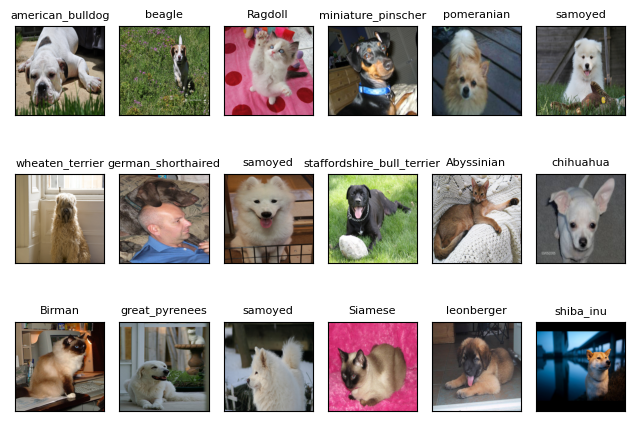

In [4]:
fig, axes = plt.subplots(3, 6)
for h_idx, h_ax in enumerate(axes):
    for v_idx, ax in enumerate(h_ax):
        index = np.random.randint(0, high=len(dataset))
        ax.imshow(dataset[index][0])
        ax.set_title(dataset.classes[dataset[index][1]], fontsize=8)
        ax.set_xticks([])
        ax.set_yticks([])
        index += 1
fig.tight_layout()
plt.show()

## Near Duplicates

Let's start by analyzing possible (near) duplicates.
In order to do so we need to compare every possible pair in the dataset ($N(N-1)/2$)!!



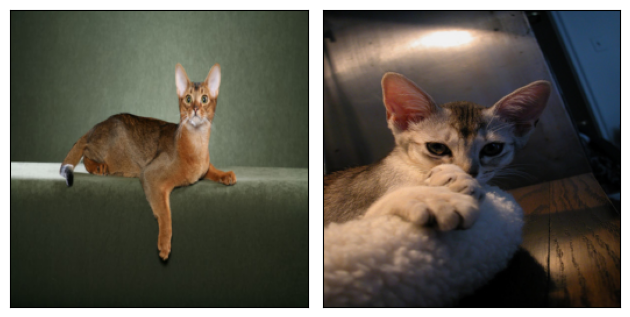

In [5]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(dataset[0][0])
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].imshow(dataset[1][0])
axes[1].set_xticks([])
axes[1].set_yticks([])
fig.tight_layout()
plt.show()

Here this would mean that we would need to compare

In [6]:
N = len(dataset)
N_ND = int((N * (N - 1)) / 2)
print(f"{N_ND:,} samples.")

27,302,355 samples.


If we consider that we need 2 seconds to verify if a sample is a (near) duplicate and go to the next one the task would take us:

In [7]:
print(str(datetime.timedelta(seconds=N_ND * 2)))

631 days, 23:58:30


## Irrelevant Samples

Let's consider the same for irrelevant samples.
Here we don't need to compare every possible pair and just need to look thourough our entiree dataset once.
However, this typically requires considering the context of the dataset!

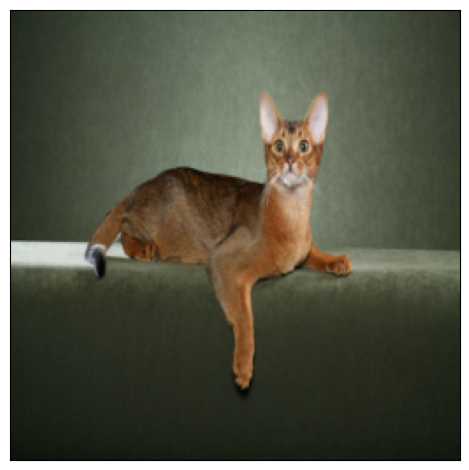

In [8]:
fig, axes = plt.subplots(1, 1)
axes.imshow(dataset[0][0])
axes.set_xticks([])
axes.set_yticks([])
fig.tight_layout()
plt.show()

Here this would mean that we would need to go thourhg

In [9]:
N = len(dataset)
print(f"{N:,} samples.")

7,390 samples.


If we consider that we again consider that we need 2 seconds to verify if a sample is an irrelevant sample and go to the next one, the task would take us:

In [10]:
print(str(datetime.timedelta(seconds=N * 2)))

4:06:20


## Label Errors

Let's consider the same for label errors.
Here we don't need to compare every possible pair and just need to look thourough our entire dataset once.
However, this typically requires domain expertise!

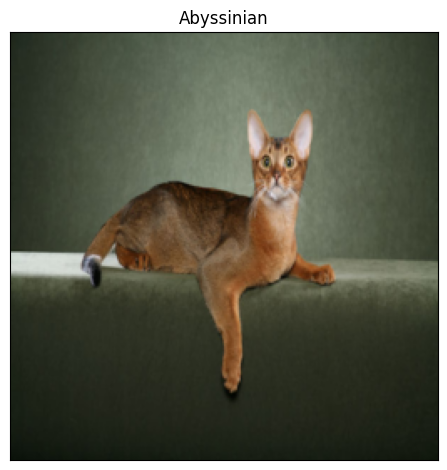

In [11]:
fig, axes = plt.subplots(1, 1)
axes.imshow(dataset[0][0])
axes.set_title(dataset.classes[dataset[0][1]])
axes.set_xticks([])
axes.set_yticks([])
fig.tight_layout()
plt.show()

Here this would mean that we would need to go thourhg

In [12]:
N = len(dataset)
print(f"{N:,} samples.")

7,390 samples.


If we consider that we again consider that we need 2 seconds (which is very optimistic) to verify if a sample is an label error and go to the next one, the task would take us:

In [13]:
print(str(datetime.timedelta(seconds=N * 2)))

4:06:20


## Conclusion

If we add all together the task of cleaning an image dataset of moderate size would take us:

In [14]:
print(str(datetime.timedelta(seconds=(N_ND + N + N) * 2)))

632 days, 8:11:10
